# Задания по классификации текста

### На входе у нас будет набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные (позитивные и негативные).

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

**Выполним импорт библиотек и загрузим данные из файла в датафрейм pandas.** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


**Проверим, есть ли какие-либо отсутствующие значения в этих данных.**

In [4]:
df.isna().sum()

label      0
review    35
dtype: int64

**Удалим отзывы о фильмах, текст которых принимает значение NaN**

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

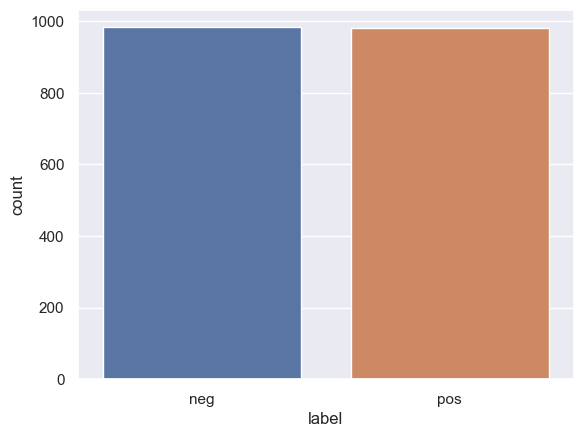

In [7]:
sns.countplot(data=df, x='label')

**Проверим, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов.**

In [8]:
df['review'].str.isspace().sum()

27

In [9]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [10]:
df = df[~df['review'].str.isspace()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Посчитаем количество строк для различных значений колонки label:**

In [12]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## Исследование данных (EDA) для мешка слов (bag of words)

**С помощью модели CountVectorizer найдем 20 наиболее часто встречающихся слов (которые не являются стоп-словами в английском языке), отдельно для каждого значения колонки label.**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(stop_words='english')

In [17]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [19]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Данные и обучение модели

**Разделим данные на признаки X и целевую переменную y, а также выполним разбиение на обучающий и тестовый наборы данных (train/test split).**

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=101)

### Обучение модели

**Создадим пайплайн, в котором мы создадим вектора TF-IDF из сырых текстовых даных, а затем обучим модель машинного обучения. После создания пайплайна выполним его обучение на обучающем наборе данных.**

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [34]:
pipe_log = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression(max_iter=1000))
pipe_line = make_pipeline(TfidfVectorizer(stop_words='english'), LinearSVC())

In [35]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [36]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('linearsvc', LinearSVC())])

In [38]:
pipe_log.score(X_test, y_test)

0.8221649484536082

In [39]:
pipe_line.score(X_test, y_test)

0.8247422680412371

**Выведим на экран отчёт "classification report" и матрицу ошибок для результатов работы пайплайна на тестовых данных.**

In [40]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [41]:
pred_log = pipe_log.predict(X_test)
pred_line = pipe_line.predict(X_test)

In [43]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



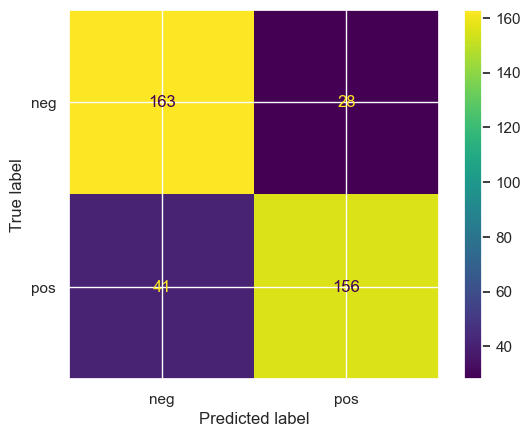

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_log)

In [45]:
print(classification_report(y_test, pred_line))

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



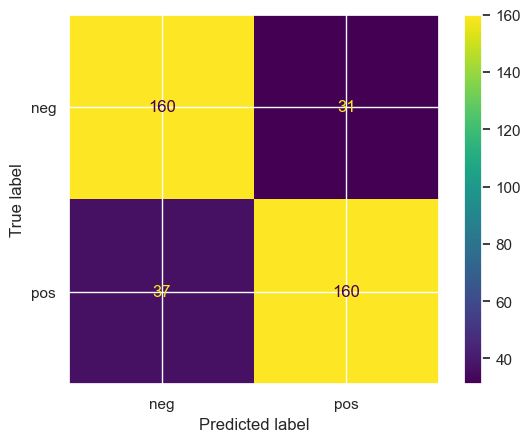

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_line)

In [50]:
df['review'].sample(5)

1972    synopsis : blond criminal psychologist sarah c...
113     steve martin is one of the funniest men alive ...
929     there's a moment in schindler's list when a nu...
63      call it touched by a demon . \r\ngregory hobli...
1737    it's time to take cover . \r\nafter a hiatus o...
Name: review, dtype: object

In [60]:
new_comment = ['super train']
pipe_log.predict(new_comment)

array(['pos'], dtype=object)

In [61]:
pipe_line.predict(new_comment)

array(['pos'], dtype=object)

## Отличная работа!